<a href="https://colab.research.google.com/github/Lauravargas070502/Ciencia-Datos/blob/master/C2%20-%20Taller%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER 1

Integrantes:
*   Laura vargas Perdomo
*   Oscar Fernando  Vargas Cerón


## Manual Explicativo: Funciones de Tiempo y Jerarquía de Fechas en Python

1. Introducción

Este manual explica el uso de funciones de tiempo y jerarquía de fechas en Python con la biblioteca Pandas.

La gestión de fechas y tiempos en ciencia de datos permite analizar datos a lo largo del tiempo y detectar patrones.


Crear y extraer componentes de fechas

 Esta parte del código genera 10 fechas seguidas (por ejemplo del 1 al 10 de enero de 2023) y luego saca partes importantes de cada fecha, como:
---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

# Crear un rango de fechas diarias
fechas = pd.date_range(start='2023-01-01', periods=10, freq='D')

# Crear un DataFrame con estas fechas
df = pd.DataFrame({'fechas': fechas})

# Extraer componentes de fecha
df['año'] = df['fechas'].dt.year
df['mes'] = df['fechas'].dt.month
df['día del mes'] = df['fechas'].dt.day
df['día de la semana'] = df['fechas'].dt.day_name()

# Mostrar el DataFrame
print(df)


      fechas   año  mes  día del mes día de la semana
0 2023-01-01  2023    1            1           Sunday
1 2023-01-02  2023    1            2           Monday
2 2023-01-03  2023    1            3          Tuesday
3 2023-01-04  2023    1            4        Wednesday
4 2023-01-05  2023    1            5         Thursday
5 2023-01-06  2023    1            6           Friday
6 2023-01-07  2023    1            7         Saturday
7 2023-01-08  2023    1            8           Sunday
8 2023-01-09  2023    1            9           Monday
9 2023-01-10  2023    1           10          Tuesday


Aquí se crean 10 fechas con un valor numérico asociado (como si fueran ventas diarias). Luego:


*   Se compara cada fecha con una fecha fija (el 5 de enero de 2023) y calcula cuántos días han pasado.
*   Se filtran solo las fechas que vienen después del 5 de enero


In [2]:


# Crear DataFrame con fechas y valores
data = pd.DataFrame({
    'fecha': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'valor': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
})

# Calcular los días pasados desde una fecha de referencia
fecha_ref = pd.to_datetime('2023-01-05')
data['días_pasados'] = (data['fecha'] - fecha_ref).dt.days

# Filtrar filas con fechas posteriores al 5 de enero
filtrado = data[data['fecha'] > '2023-01-05']

# Mostrar resultados
print("Datos originales:")
print(data)

print("\nDatos filtrados:")
print(filtrado)


Datos originales:
       fecha  valor  días_pasados
0 2023-01-01     10            -4
1 2023-01-02     15            -3
2 2023-01-03     20            -2
3 2023-01-04     25            -1
4 2023-01-05     30             0
5 2023-01-06     35             1
6 2023-01-07     40             2
7 2023-01-08     45             3
8 2023-01-09     50             4
9 2023-01-10     55             5

Datos filtrados:
       fecha  valor  días_pasados
5 2023-01-06     35             1
6 2023-01-07     40             2
7 2023-01-08     45             3
8 2023-01-09     50             4
9 2023-01-10     55             5


Aquí se simulan ventas diarias durante 90 días (aproximadamente 3 meses). Luego:


*   Se agrupan todas las ventas por mes
*   Se suma el total de ventas de cada mes

In [3]:


# Crear datos de ventas simuladas por día
df = pd.DataFrame({
    'fecha': pd.date_range(start='2023-01-01', periods=90, freq='D'),
    'ventas': np.random.randint(100, 1000, size=90)
})

# Agrupar por mes
df['mes'] = df['fecha'].dt.to_period('M')
ventas_mensuales = df.groupby('mes')['ventas'].sum()

# Mostrar resultados
print("Ventas mensuales:")
print(ventas_mensuales)


Ventas mensuales:
mes
2023-01    18602
2023-02    14034
2023-03    18269
Freq: M, Name: ventas, dtype: int64


Esta parte también usa datos de ventas durante 90 días, pero hace dos cosas:

*   Agrupa las ventas por trimestre (cada 3 meses) y calcula el promedio de ventas.

*   Agrupa las ventas por mes y crea un gráfico de barras para mostrar visualmente los resultados.



Ventas promedio por trimestre:
trimestre
1    280.522222
Name: ventas, dtype: float64


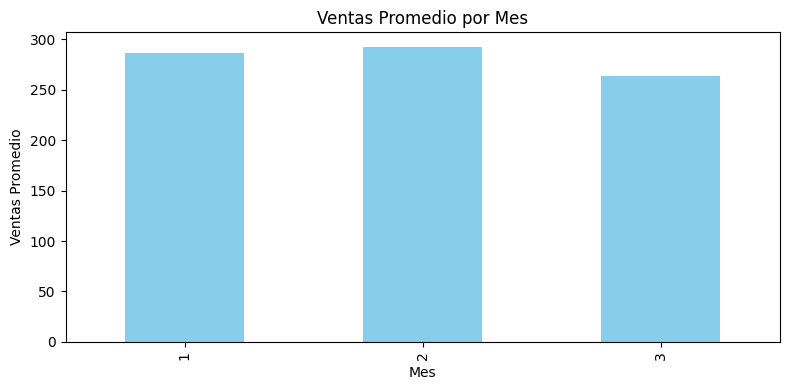

In [4]:



# Crear datos de ventas simuladas
ventas = pd.DataFrame({
    'fecha': pd.date_range(start='2023-01-01', periods=90, freq='D'),
    'ventas': np.random.randint(100, 500, size=90)
})

# Agrupar por trimestre
ventas['trimestre'] = ventas['fecha'].dt.quarter
ventas_trim = ventas.groupby('trimestre')['ventas'].mean()
print("Ventas promedio por trimestre:")
print(ventas_trim)

# Agrupar por mes y visualizar
ventas['mes'] = ventas['fecha'].dt.month
ventas_mes = ventas.groupby('mes')['ventas'].mean()

# Crear gráfico de barras
plt.figure(figsize=(8, 4))
ventas_mes.plot(kind='bar', color='skyblue')
plt.title('Ventas Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.tight_layout()
plt.show()
